<a href="https://colab.research.google.com/github/sweetiepickle/AI-23-final-project/blob/main/final_report_traffic_sign_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


check if we are currently using the gpu on any other projects

In [ ]:
!nvidia-smi

Mon May 15 15:16:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# libraries
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data -> model -> compile -> evaluate

In [ ]:
trainPath = "/content/drive/MyDrive/AI 2023/data/traffic sign/train"
testPath = "/content/drive/MyDrive/AI 2023/data/traffic sign/test"

In [ ]:
# step 1 : data initializing 

# augmentation : artificially increase the size of our training dataset
# orginal value of an image is from 0 to 255
# desired value is from 0 to 1 
augmentationData = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) 

# datasets images
trainData= augmentationData.flow_from_directory(trainPath,target_size=(150,150), batch_size=32, class_mode='categorical')
testData= augmentationData.flow_from_directory(testPath,target_size=(150,150), batch_size=32, class_mode='categorical')

Found 10338 images belonging to 6 classes.
Found 1163 images belonging to 6 classes.


 Classifying folders in order to get acknowledge the ouput amounts.

In [ ]:
# folder classifying
trainData.class_indices

{'crosswalk': 0,
 'cycle route ahead': 1,
 'roundabout': 2,
 'speed limit': 3,
 'stop': 4,
 'traffic light': 5}

In [ ]:
# folder classifying
testData.class_indices

{'crosswalk': 0,
 'cycle cross ahead': 1,
 'roundabout': 2,
 'speed limit': 3,
 'stop': 4,
 'trafffic light': 5}

In [ ]:
# step 2 : cnn netwwork : sequential model
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

# Data flattening 
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
# step 4 :compiling

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(trainData, batch_size = 128, epochs = 30 , verbose = 1)

Epoch 1/30
324/324 [==============================] - 4081s 13s/step - loss: 0.5248 - accuracy: 0.8435
Epoch 2/30
324/324 [==============================] - 91s 281ms/step - loss: 0.1190 - accuracy: 0.9695
Epoch 3/30
324/324 [==============================] - 91s 281ms/step - loss: 0.0984 - accuracy: 0.9721
Epoch 4/30
324/324 [==============================] - 89s 277ms/step - loss: 0.0812 - accuracy: 0.9758
Epoch 5/30
324/324 [==============================] - 91s 280ms/step - loss: 0.0679 - accuracy: 0.9784
Epoch 6/30
324/324 [==============================] - 89s 274ms/step - loss: 0.1023 - accuracy: 0.9715
Epoch 7/30
324/324 [==============================] - 90s 277ms/step - loss: 0.0772 - accuracy: 0.9770
Epoch 8/30
324/324 [==============================] - 98s 301ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 9/30
324/324 [==============================] - 95s 291ms/step - loss: 0.0606 - accuracy: 0.9812
Epoch 10/30
324/324 [==============================] - 95s 293ms/step - l

evaluating model

In [ ]:
eva = model.evaluate(trainData, verbose = 1)
# verbose = 0 -> display nothing
# verbose = 1 -> display only learns recently
# verbose = 2 -> display everything learnt
print('loss: ', eva[0])
print('accuracy: ', eva[1])

324/324 [==============================] - 88s 269ms/step - loss: 0.0184 - accuracy: 0.9942
loss:  0.01839524134993553
accuracy:  0.9941961765289307


saving model

In [ ]:
model.save('/content/drive/MyDrive/AI 2023/model AI/ traffic sign.h5')

testing

1/1 [==============================] - 0s 132ms/step
speed limit


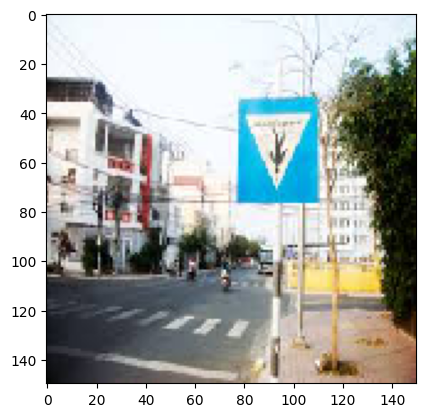

1/1 [==============================] - 0s 27ms/step
speed limit


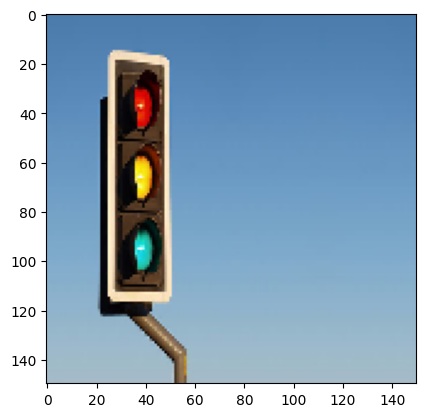

1/1 [==============================] - 0s 30ms/step
speed limit


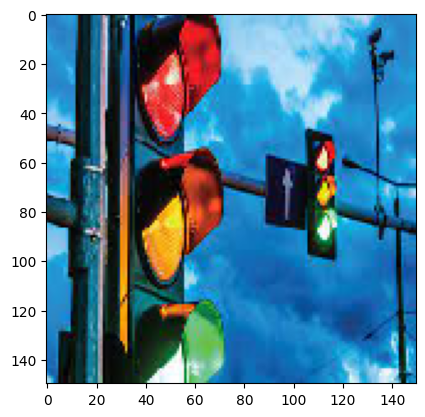

1/1 [==============================] - 0s 20ms/step
crosswalk


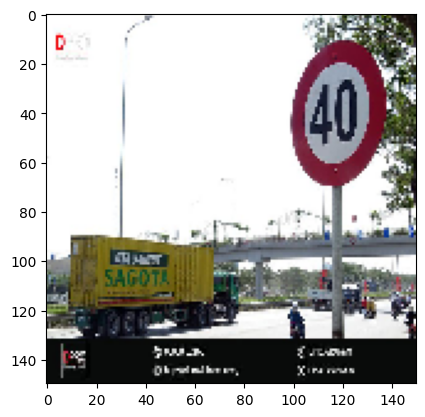

1/1 [==============================] - 0s 22ms/step
speed limit


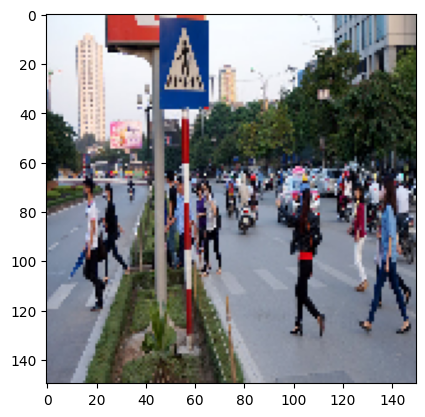

1/1 [==============================] - 0s 20ms/step
crosswalk


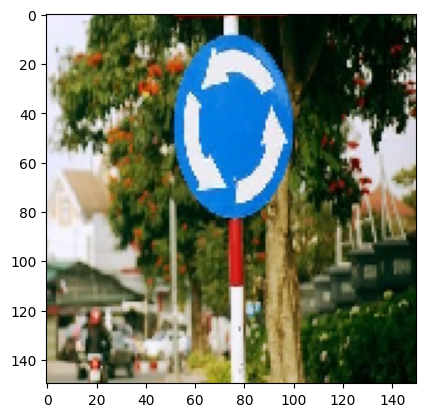

1/1 [==============================] - 0s 19ms/step
speed limit


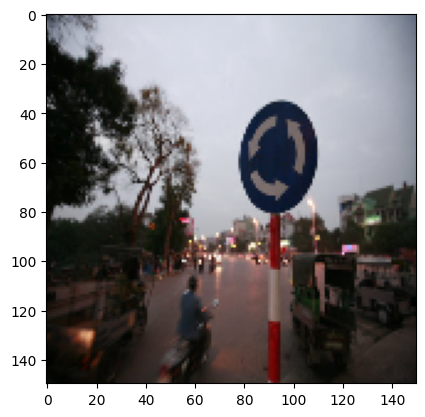

1/1 [==============================] - 0s 19ms/step
crosswalk


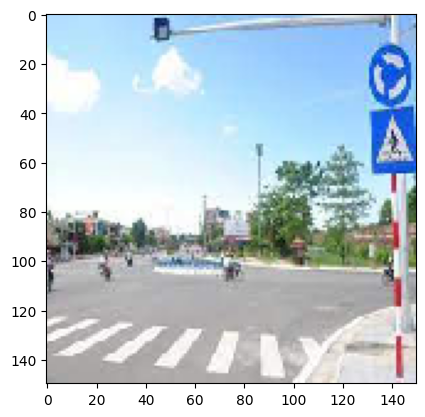

1/1 [==============================] - 0s 25ms/step
speed limit


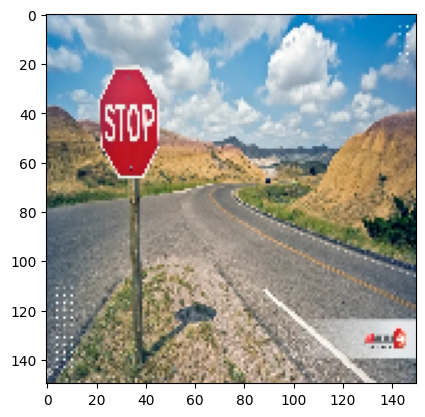

1/1 [==============================] - 0s 20ms/step
roundabout


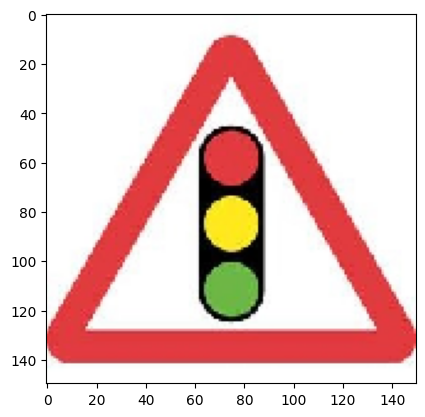

1/1 [==============================] - 0s 41ms/step
crosswalk


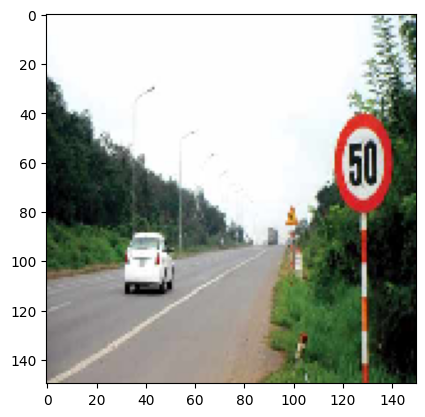

1/1 [==============================] - 0s 28ms/step
stop


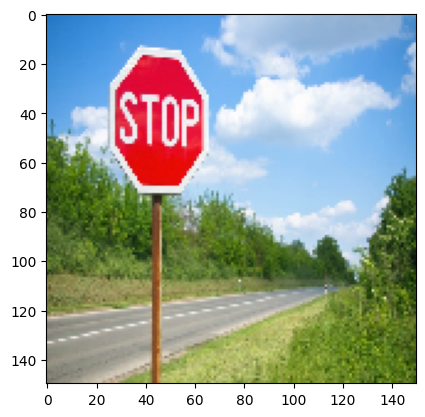

1/1 [==============================] - 0s 37ms/step
speed limit


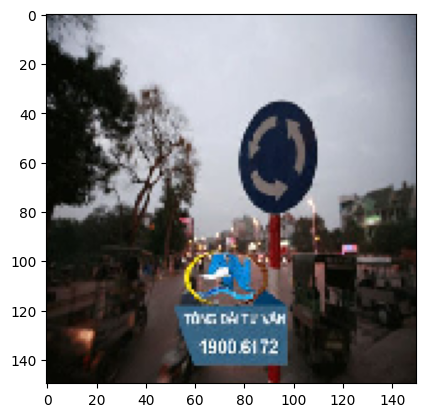

In [ ]:
model_1=load_model('/content/drive/MyDrive/AI 2023/model AI/ traffic sign.h5')

test = '/content/drive/MyDrive/AI 2023/data/traffic sign/validation'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['speed limit','stop','traffic light','crosswalk','cycle route ahead','roundabout']
  print(class_name[result])
  plt.show()